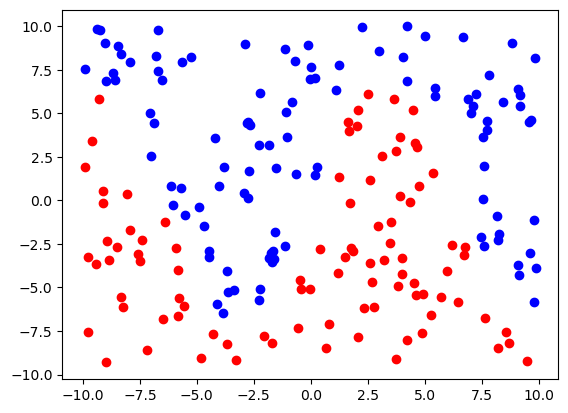

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from nn_from_scratch.nn import MLP

# DEMO: train neural network to classify nonlinear data

# generate data
def nonlinear_boundary(x):
    return 7 * np.sin(0.5 * x) 

n_samples = 200
X = np.random.uniform(-10, 10, (n_samples, 2))
Y = (X[:, 1] > nonlinear_boundary(X[:, 0]))

plt.figure()
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue')

In [49]:
# initalize model
model = MLP([2, 16, 16, 1])
num_iter = 200
learning_rate = 1e-3

# train
for k in range(num_iter):
    # forward pass
    ypred = [model(x) for x in X]
    loss = sum((y_a - y_p)**2 for y_a, y_p in zip(Y, ypred))
    # backprop
    for p in model.parameters():
        p.grad = 0 # zero-grad after each iteration
    loss.backprop()
    # update model
    for p in model.parameters():
        p.value += -learning_rate * p.grad
    # track training loss
    if k % 10 == 0:
        print(f"Iter {k} | Loss: {loss.value}")


Iter 0 | Loss: 82.90240596984978
Iter 10 | Loss: 24.674709078253468
Iter 20 | Loss: 22.096709295810268
Iter 30 | Loss: 22.018006738277474
Iter 40 | Loss: 23.578625442269455
Iter 50 | Loss: 22.470156224846924
Iter 60 | Loss: 20.645715871435648
Iter 70 | Loss: 20.08471564939399
Iter 80 | Loss: 19.192180263989982
Iter 90 | Loss: 18.63677469130445
Iter 100 | Loss: 18.041021878365914
Iter 110 | Loss: 17.524488326213586
Iter 120 | Loss: 17.008634902699885
Iter 130 | Loss: 16.502355421923916
Iter 140 | Loss: 16.008849370391573
Iter 150 | Loss: 15.545151533718885
Iter 160 | Loss: 15.115466847993131
Iter 170 | Loss: 14.721130615032173
Iter 180 | Loss: 14.358323192828246
Iter 190 | Loss: 14.014635140404728


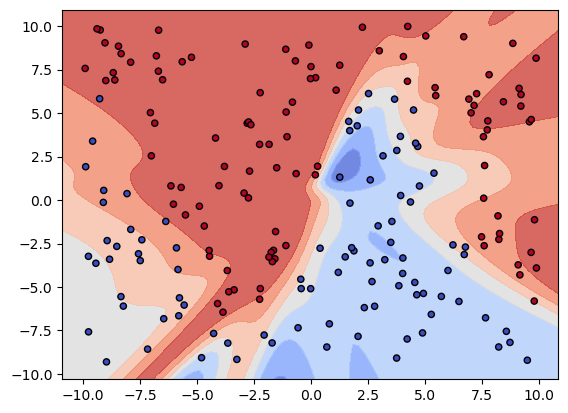

In [53]:
# visualize model decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model(z).value for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)